## Applied Machine Learning, Module 1: A simple classification task¶

## Import required modules and load data file

In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
from sklearn.model_selection import train_test_split

fruits = pd.read_table("../data/fruit_data_with_colors.txt")

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.shape

(59, 7)

In [6]:
lookup_fruit_name = fruits.drop_duplicates(['fruit_label','fruit_name'])[['fruit_label','fruit_name']].set_index('fruit_label').to_dict()['fruit_name']

lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create test train split

In [7]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=0)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(44, 4) (44,) (15, 4) (15,)


## Examining the data

<IPython.core.display.Javascript object>


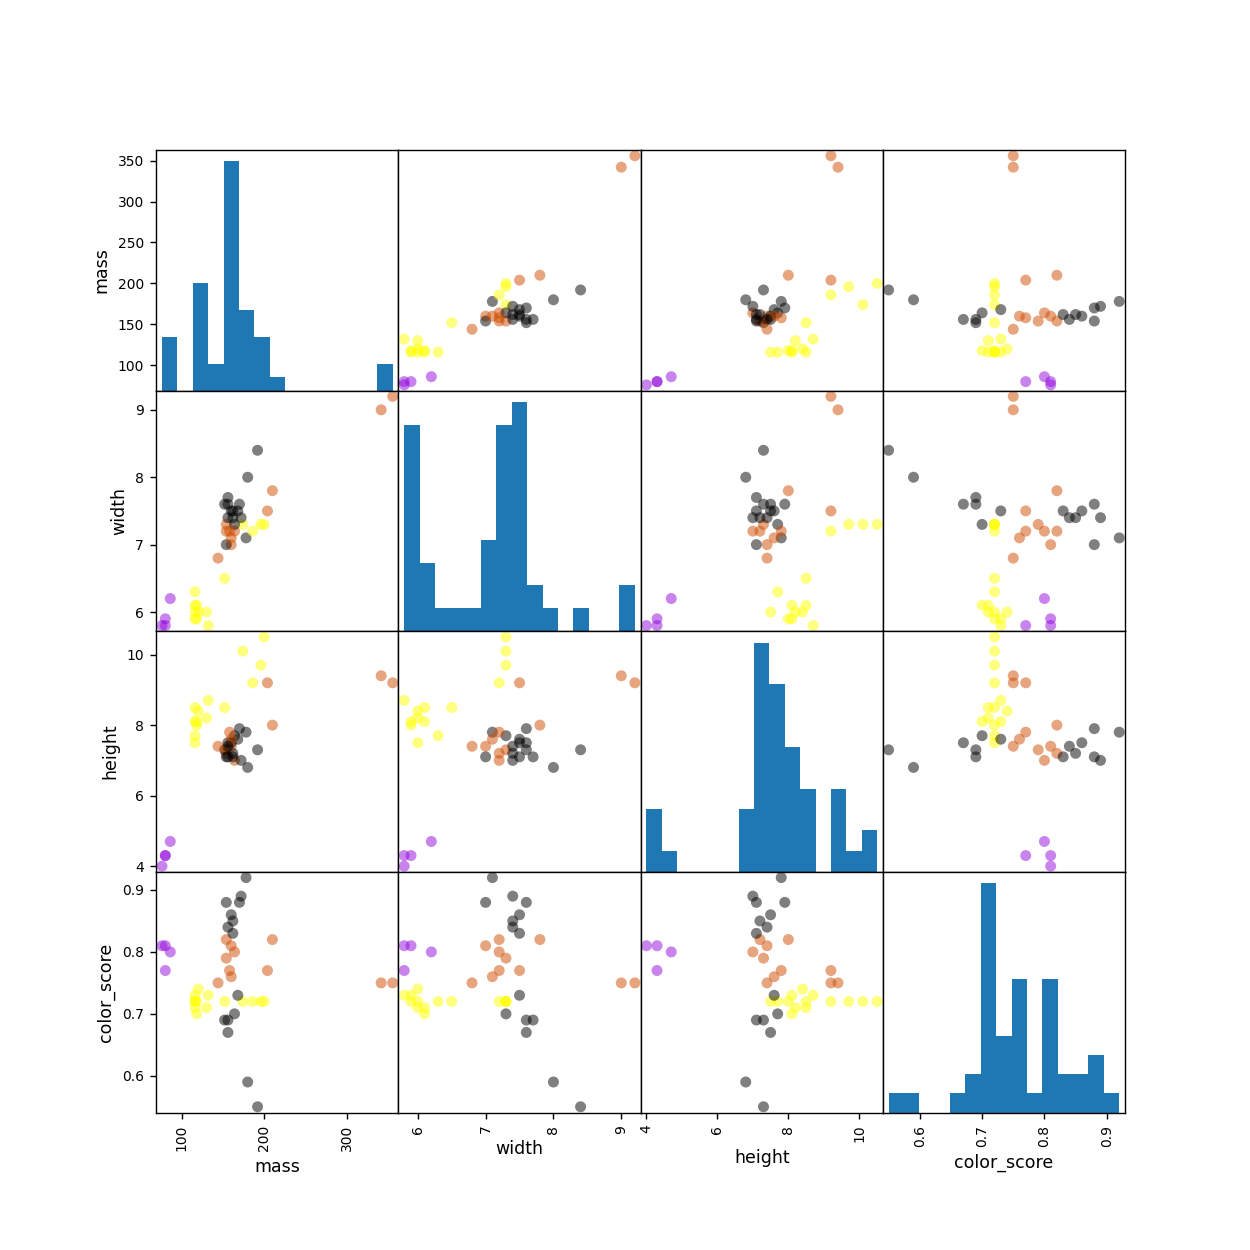

In [36]:
# feature pair plot

from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(train_X, c=train_y, marker='o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

<IPython.core.display.Javascript object>


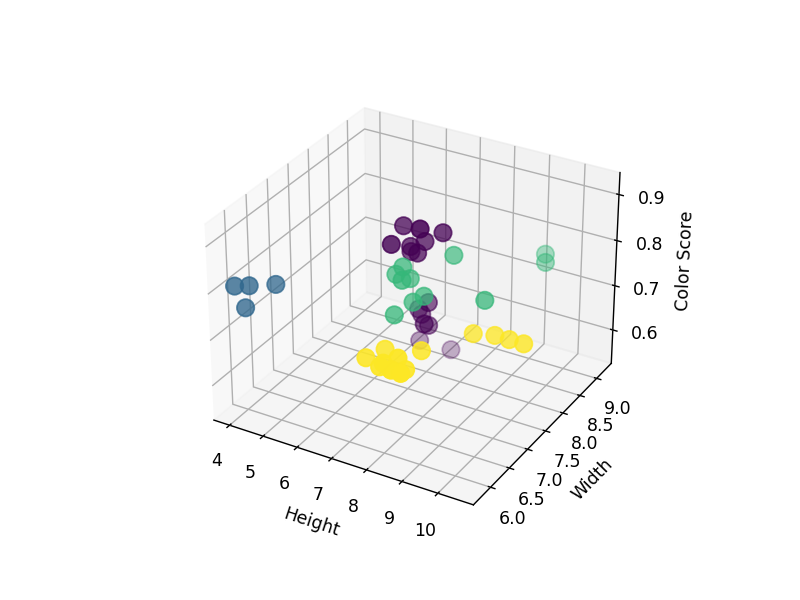

In [41]:
# 3D feature scatterplot

from mpl_toolkits.mplot3d import Axes3D
figure = ptl.figure()

ax = figure.add_subplot(111, projection='3d')
ax.scatter(train_X['height'],train_X['width'],train_X['color_score'],c=train_y, marker='o', s=100)
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Color Score')
ptl.show()

## Create the calssifier object

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

## Train the classifier (fit the estimator) using the training data

In [44]:
knn.fit(train_X, train_y)

KNeighborsClassifier()

## Estimate the accuracy of the classifier on future data, using the test data

In [45]:
knn.score(test_X, test_y)

0.5333333333333333

## Use the trained k-NN classifier model to classify new, previsouly unseen objects

In [50]:
fruit_prediction = knn.predict([[159, 7,7,0.75]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

In [63]:
fruit_prediction = knn.predict([[356, 6,10,0.5]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

## K vs Accuracy

In [10]:
accuracy = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    accuracy.append(knn.score(test_X,test_y))

<IPython.core.display.Javascript object>


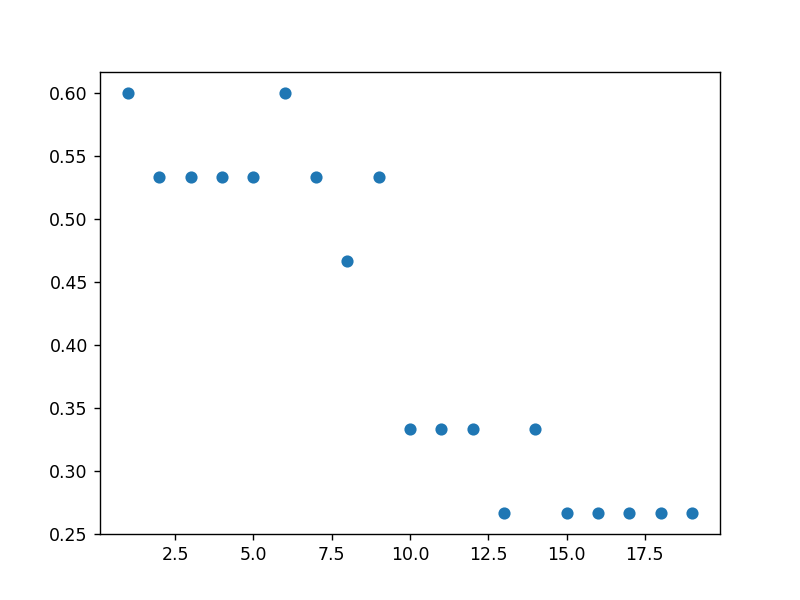

In [14]:
ptl.plot(range(1,20), accuracy,'o')
ptl.show()